In [2]:
import numpy
import scipy
import sklearn

print("NumPy:", numpy.__version__)
print("SciPy:", scipy.__version__)
print("scikit-learn:", sklearn.__version__)


NumPy: 1.26.4
SciPy: 1.11.4
scikit-learn: 1.3.2


Predictions: [49.  56.5 64.  71.5 79. ]
slope: 7.50, intercept: 41.50


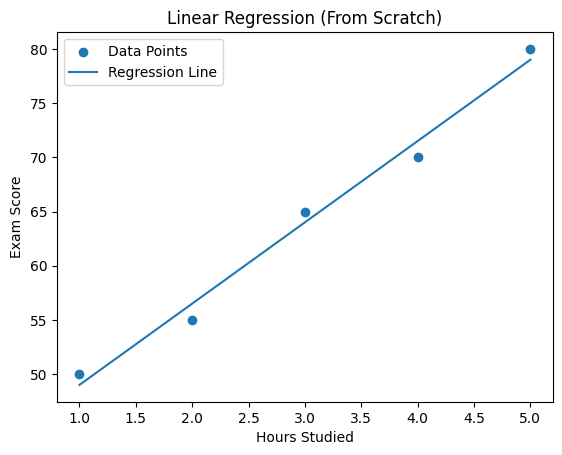

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([50, 55, 65, 70, 80])

class SimpleLinearRegression:
    def fit(self, X, y):
        X = X.flatten()   # ensure 1D
        n = len(X)

        x_mean = np.mean(X)
        y_mean = np.mean(y)

        self.slope = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean) ** 2)
        self.intercept = y_mean - self.slope * x_mean

    def predict(self, X):
        return self.intercept + self.slope * X

model = SimpleLinearRegression()
model.fit(X, y)

predictions = model.predict(X)

print("Predictions:", predictions.flatten())
print(f"slope: {model.slope:.2f}, intercept: {model.intercept:.2f}")

# Plot
plt.scatter(X, y, label="Data Points")
plt.plot(X, predictions, label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear Regression (From Scratch)")
plt.legend()
plt.show()


Slope: 7.500000000000001
Intercept: 41.5


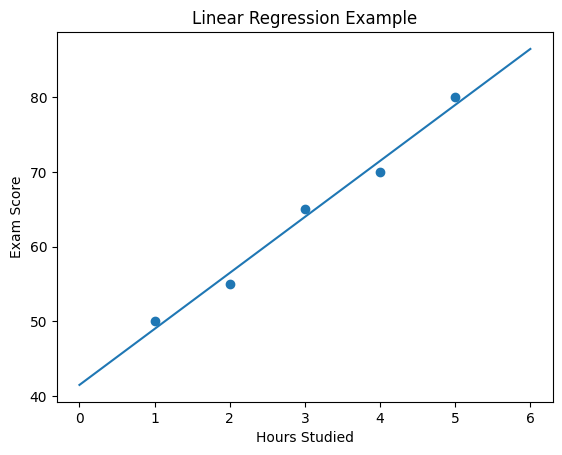

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example data: hours studied vs exam score
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([50, 55, 65, 70, 80])

# Create model
model = LinearRegression()
model.fit(X, y)

# Get parameters
slope = model.coef_[0]
intercept = model.intercept_

print("Slope:", slope)
print("Intercept:", intercept)

# Predictions
X_test = np.linspace(0, 6, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# Plot
plt.scatter(X, y)
plt.plot(X_test, y_pred)
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear Regression Example")
plt.show()

Polynomial prediction for 6 hours: [[ 1.  6. 36.]]
Polynomial expression in terms of x: 3 terms, [1. 1. 1.]


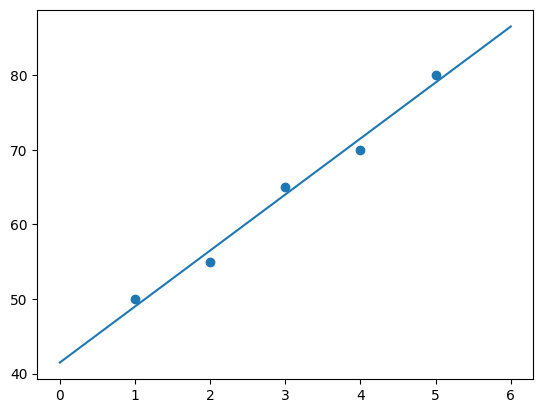

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(degree=2)
poly_model.fit(X,y)
print("Polynomial prediction for 6 hours:",
      poly_model.transform([[6]]))

y_pred_poly = poly_model.fit_transform(X_test) @ np.array([intercept, slope, 0])  # add zero for the quadratic term

plt.scatter(X, y)
plt.plot(X_test, y_pred_poly)

print("Polynomial expression in terms of x:", 
      f"{poly_model.fit_transform(X).shape[1]} terms, {poly_model.fit_transform(X)[0]}")

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

Initial shape: (20640, 10)

Columns:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Missing values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Train shape: (16512, 10)
Test shape: (4128, 10)



Final training shape: (16512, 16)
Final test shape: (4128, 16)

Sample of processed training data:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196   1.272587 -1.372811            0.348490     0.222569        0.211228   
8267    0.709162 -0.876696            1.618118     0.340293        0.593094   
17445  -0.447603 -0.460146           -1.952710    -0.342597       -0.495226   
14265   1.232698 -1.382172            0.586545    -0.561490       -0.409306   
2271   -0.108551  0.532084            1.142008    -0.119565       -0.256559   

       population  households  median_income  rooms_per_household  \
14196    0.768276    0.322906      -0.326196            -0.174916   
8267    -0.098901    0.672027      -0.035843            -0.402835   
17445   -0.449818   -0.430461       0.144701             0.088216   
14265   -0.007434   -0.380587      -1.017864            -0.600015   
2271    -0.485877   -0.314962      -0.171488             0.349007   

       bed

c:\Users\Haruku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.110e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


               Model           MAE
4      Random Forest  31876.781075
3      Decision Tree  43245.463421
0  Linear Regression  49645.492445
2   Lasso Regression  49645.493578
1   Ridge Regression  49652.142873



Model Comparison with Log Target (Sorted by MSE):

               Model       MSE       MAE
4      Random Forest  0.053228  0.157136
3      Decision Tree  0.103963  0.219810
0  Linear Regression  0.111948  0.251317
1   Ridge Regression  0.111960  0.251348
2   Lasso Regression  0.117422  0.261609


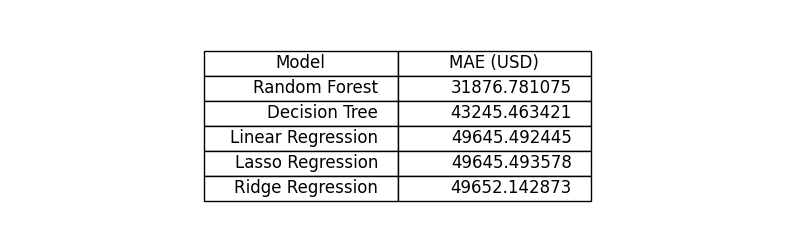